In [54]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16,ResNet50


**2.Carga de las imágenes**

In [2]:
images = []

In [3]:
# Directorio donde están almacenadas las imágenes
image_dir = 'C:/Users/andre/Documents/Video07/framesVideo/surco-rouviere'
image_dir2 = 'C:/Users/andre/Documents/Video02/framesVideo/extraccion'

**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [4]:
def read_imageResize_with_labels(dir='..\database\dataset', target_size=(224, 224)):
    """
    Lee imágenes de un directorio, las redimensiona a 224x224 píxeles y las etiqueta según 
    la carpeta en la que se encuentran. Las imágenes son procesadas en escala de grises.

    Parámetros:
    dir (str): La ruta del directorio que contiene las carpetas 'antes-cirugia', 
               'durante-cirugia', y 'despues-cirugia'. Las carpetas deben estar en la 
               misma ubicación. Las carpetas no definidas recibirán una etiqueta de -1.

    Retorno:
    tuple: Una tupla que contiene dos elementos:
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - list: Una lista de etiquetas correspondientes a las imágenes.
    """
    labels = []
    imgs = []
    
    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, label in class_folders.items():
        folder_path = os.path.join(dir, folder)
        
        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue
        
        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)
            
            # Leer la imagen 
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Redimensionar la imagen
            image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
            image = image / 255.0

            # Agregar la imagen y su etiqueta a las listas
            imgs.append(image)
            labels.append(label)
    
    return np.array(imgs), labels

In [5]:
# Llamar a la función con la ruta adecuada
images, labels = read_imageResize_with_labels(dir='./')

# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
print(f"Etiquetas únicas: {set(labels)}")

Número de imágenes: 588
Tamaño de cada imagen: (224, 224, 3)
Etiquetas únicas: {0, 1, 2}


In [6]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [7]:
print(images.shape)

(588, 224, 224, 3)


In [8]:
labels[0:3]

[0, 0, 0]

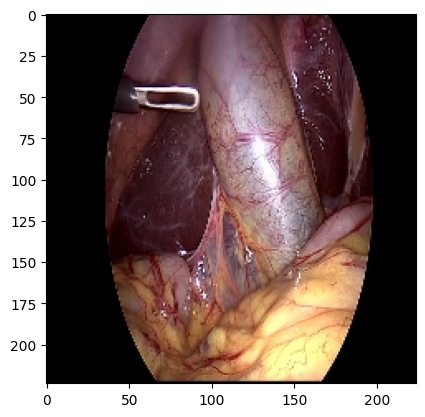

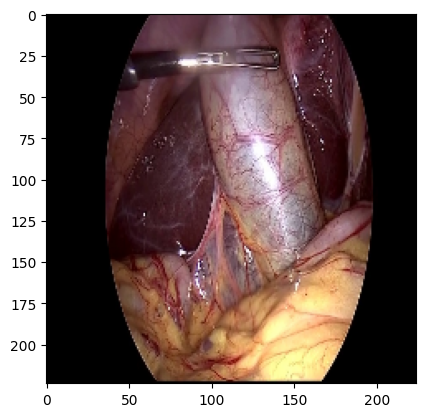

In [9]:
for i in range(2):
    plt.imshow(images[i])
    plt.show()

In [10]:
images.shape

(588, 224, 224, 3)

**División train-test**

In [11]:
labels = np.array(labels)

In [12]:


# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val= train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels)

# Convertir las etiquetas a formato one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)



In [89]:
from collections import Counter 
# Verificar las proporciones en los conjuntos de entrenamiento, validación y prueba
print("Proporciones en el conjunto de entrenamiento:", Counter(y_train))
print("Proporciones en el conjunto de validación:", Counter(y_val))


Proporciones en el conjunto de entrenamiento: Counter({1: 157, 0: 157, 2: 156})
Proporciones en el conjunto de validación: Counter({2: 40, 1: 39, 0: 39})


In [91]:
y_val_cat

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0

**Entrenamiento de modelo de transfer learning**

In [55]:
#Early stopping para que se detenga el entranamiento si a las 5 épocas no mejora el accuracy

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [56]:
# callback para detener el entrenamiento si se alcanza el accuracy deseado
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.84):
      print("Accuracy alcanzado")
      self.model.stop_training = True

In [57]:
stop = myCallback()

In [108]:
def create_model(base_model_name='VGG16', input_shape=(224, 224, 3), freeze_base_model=True,layers_to_train=0):
    """
    Crea un modelo basado en VGG16 o ResNet50 con la estructura especificada para predecir clases
    utilizando imágenes y coordenadas como entradas.

    Parámetros:
    -----------
    base_model_name : str, opcional
        Nombre del modelo base a utilizar ('VGG16' o 'ResNet50'). Por defecto es 'VGG16'.
    input_shape : tuple, opcional
        Tamaño de la entrada de las imágenes. Por defecto es (224, 224, 3).
    coord_shape : tuple, opcional
        Tamaño de la entrada para las coordenadas. Por defecto es (3, 4).
    freeze_base_model : bool, opcional
        Si True, congela las capas del modelo base. Por defecto es True.

    Retorno:
    --------
    model : keras.Model
        Modelo compilado listo para ser entrenado.
    """
    # Selección del modelo base
    if base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("base_model_name must be either 'VGG16' or 'ResNet50'")

    # Congelar o descongelar capas del modelo base
    if freeze_base_model:
        for layer in base_model.layers:
            layer.trainable = False

        # Si se especifican capas a entrenar, descongelar las últimas `layers_to_train` capas
        if layers_to_train > 0:
            for layer in base_model.layers[-layers_to_train:]:
                layer.trainable = True
    else:
        # Si no se quiere congelar el modelo base, todas las capas serán entrenables
        for layer in base_model.layers:
            layer.trainable = True

    # Entrada para las imágenes
    image_input = base_model.input

    # Extraer características de la imagen
    x = base_model.output
    x = Flatten()(x)


    # Añadir capas densas finales
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)

    # Crear el modelo con  entrada de imágenes
    model = Model(inputs=image_input, outputs=output)

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Resumen del modelo
    model.summary()

    return model


**VGG16**

In [109]:
model_vgg16 = create_model(base_model_name='VGG16', input_shape=(224, 224, 3), freeze_base_model=True,layers_to_train=0)


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [110]:
# Paso 4: Entrenar el modelo
history_vgg16 = model_vgg16.fit(
    X_train, y_train_cat,
    epochs=10,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stopping])

Epoch 1/10
15/15 [==============================] - 3s 150ms/step - loss: 0.9880 - accuracy: 0.5511 - val_loss: 0.5262 - val_accuracy: 0.9237
Epoch 2/10
15/15 [==============================] - 2s 132ms/step - loss: 0.4057 - accuracy: 0.9000 - val_loss: 0.2474 - val_accuracy: 0.9407
Epoch 3/10
15/15 [==============================] - 2s 132ms/step - loss: 0.2386 - accuracy: 0.9298 - val_loss: 0.1578 - val_accuracy: 0.9746
Epoch 4/10
15/15 [==============================] - 2s 129ms/step - loss: 0.1442 - accuracy: 0.9745 - val_loss: 0.1532 - val_accuracy: 0.9576
Epoch 5/10
15/15 [==============================] - 2s 133ms/step - loss: 0.1014 - accuracy: 0.9872 - val_loss: 0.0951 - val_accuracy: 0.9831
Epoch 6/10
15/15 [==============================] - 2s 128ms/step - loss: 0.0906 - accuracy: 0.9851 - val_loss: 0.0881 - val_accuracy: 0.9746
Epoch 7/10
15/15 [==============================] - 2s 131ms/step - loss: 0.0618 - accuracy: 0.9894 - val_loss: 0.0639 - val_accuracy: 0.9915
Epoch 

**Resnet50**

In [111]:
model_resnet = create_model(base_model_name='ResNet50', input_shape=(224, 224, 3), freeze_base_model=True,layers_to_train=0)

# Paso 4: Entrenar el modelo

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [112]:


history_resnet = model_resnet.fit(
    X_train, y_train_cat,
    epochs=30,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stopping,stop])

Epoch 1/30
15/15 [==============================] - 4s 155ms/step - loss: 1.3369 - accuracy: 0.3957 - val_loss: 0.9522 - val_accuracy: 0.6610
Epoch 2/30
15/15 [==============================] - 1s 86ms/step - loss: 0.9680 - accuracy: 0.5085 - val_loss: 0.8740 - val_accuracy: 0.6271
Epoch 3/30
15/15 [==============================] - 1s 85ms/step - loss: 0.8665 - accuracy: 0.5830 - val_loss: 0.8805 - val_accuracy: 0.6017
Epoch 4/30
15/15 [==============================] - 1s 86ms/step - loss: 0.8423 - accuracy: 0.6340 - val_loss: 0.9107 - val_accuracy: 0.5593
Epoch 5/30
15/15 [==============================] - 1s 94ms/step - loss: 0.8128 - accuracy: 0.6298 - val_loss: 0.7777 - val_accuracy: 0.6780
Epoch 6/30
15/15 [==============================] - 1s 94ms/step - loss: 0.7578 - accuracy: 0.6532 - val_loss: 0.7442 - val_accuracy: 0.7288
Epoch 7/30
15/15 [==============================] - 1s 83ms/step - loss: 0.7412 - accuracy: 0.6809 - val_loss: 0.7197 - val_accuracy: 0.7119
Epoch 8/30
1

**Métricas**

In [113]:
# Visualización de curvas de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    
    plt.show()

In [114]:
def evaluate_model(model, X_val, y_val_cat, class_names=['antes-cirugia', 'durante-cirugia', 'despues-cirugia']):
    """
    Evalúa el modelo en el conjunto de validación y genera un reporte de clasificación
    junto con una matriz de confusión.

    Parámetros:
    -----------
    model : keras.Model
        Modelo entrenado que se va a evaluar.
    X_val : np.ndarray
        Conjunto de datos de validación (imágenes).
    coord_val : np.ndarray
        Conjunto de datos de validación (coordenadas).
    y_val_cat : np.ndarray
        Etiquetas de validación en formato one-hot.
    class_names : list
        Lista con los nombres de las clases (por defecto: ['antes-cirugia', 'durante-cirugia', 'despues-cirugia']).

    Retorno:
    --------
    None
    """
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Generar predicciones para el conjunto de validación
    y_val_pred = model.predict(X_val)

    # Convertir predicciones y etiquetas reales a sus índices de clase
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val_cat, axis=1)

    # Generar un reporte de clasificación
    report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
    print("Classification Report:\n", report)

    # Generar una matriz de confusión
    conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()



**VGG16 resultados**

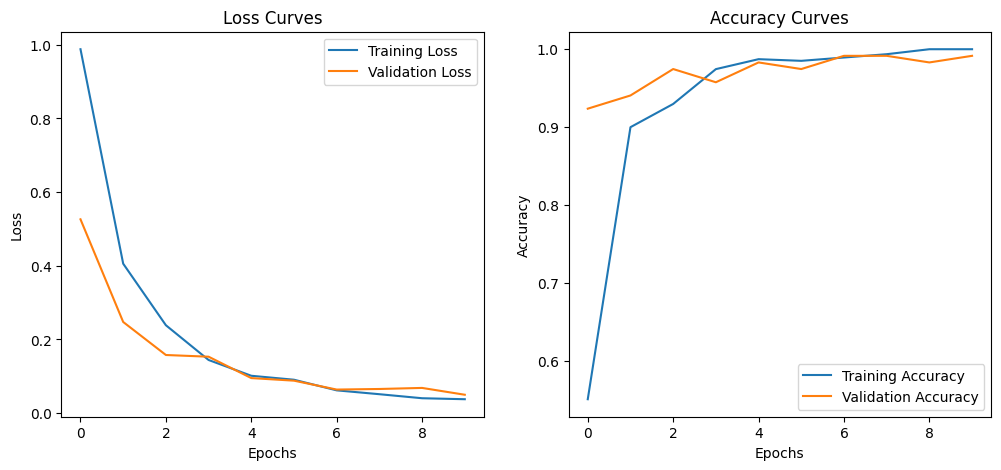

In [115]:
plot_training_history(history_vgg16)

In [116]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_vgg16.evaluate(X_val, y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


4/4 [==============================] - 0s 93ms/step - loss: 0.0499 - accuracy: 0.9915
Validation Loss: 0.04986538738012314
Validation Accuracy: 0.991525411605835


4/4 [==============================] - 0s 99ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       1.00      1.00      1.00        39
durante-cirugia       1.00      0.97      0.99        39
despues-cirugia       0.98      1.00      0.99        40

       accuracy                           0.99       118
      macro avg       0.99      0.99      0.99       118
   weighted avg       0.99      0.99      0.99       118



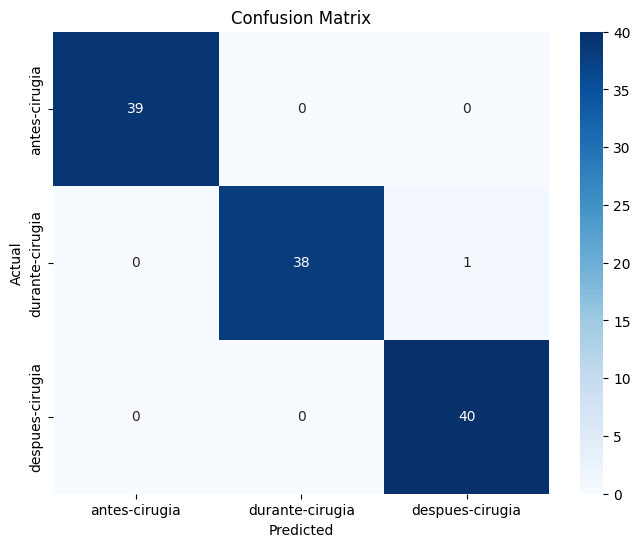

In [117]:
evaluate_model(model_vgg16, X_val, y_val_cat)


**Resnet50 Resultados**

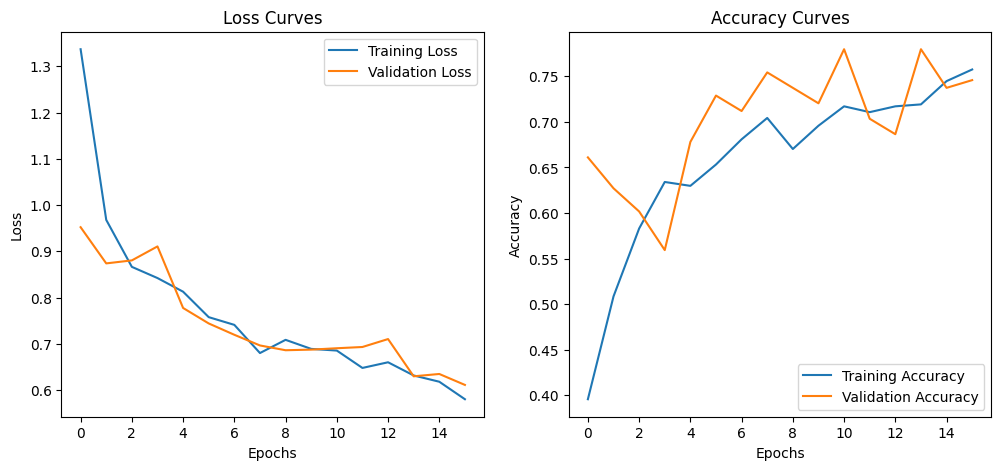

In [118]:
plot_training_history(history_resnet)

In [119]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_resnet.evaluate(X_val, y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

4/4 [==============================] - 0s 59ms/step - loss: 0.6907 - accuracy: 0.7797
Validation Loss: 0.6906511187553406
Validation Accuracy: 0.7796609997749329


4/4 [==============================] - 1s 65ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       0.85      0.90      0.88        39
durante-cirugia       0.76      0.82      0.79        39
despues-cirugia       0.71      0.62      0.67        40

       accuracy                           0.78       118
      macro avg       0.78      0.78      0.78       118
   weighted avg       0.78      0.78      0.78       118



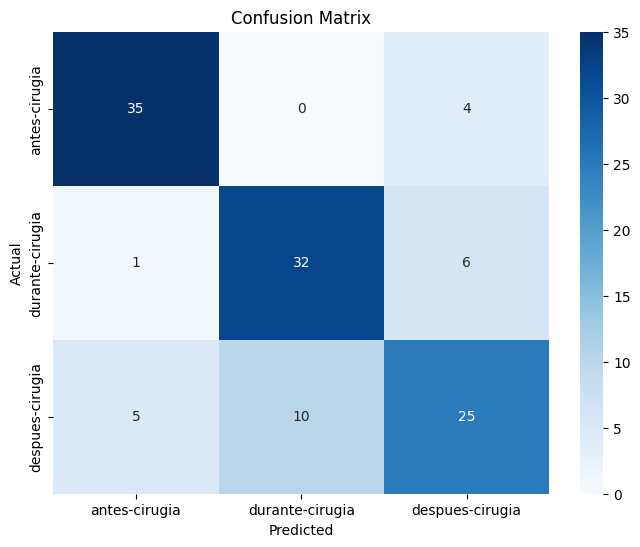

In [120]:
evaluate_model(model_resnet, X_val, y_val_cat)

**Comparación modelos**

In [121]:
def plot_comparison(history_vgg16, history_resnet50):
    """
    Genera una gráfica comparativa de la pérdida (loss) y precisión (accuracy) entre dos modelos entrenados.

    Parámetros:
    -----------
    history_vgg16 : keras.callbacks.History
        Historial de entrenamiento del modelo VGG16.
    history_resnet50 : keras.callbacks.History
        Historial de entrenamiento del modelo ResNet50.
    """
    plt.figure(figsize=(14, 6))

    # Comparación de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
    plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Validation Accuracy')
    plt.title('Comparación de validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Val accuracy')
    plt.legend()

    # Comparación de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
    plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
    plt.title('Comparación de accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


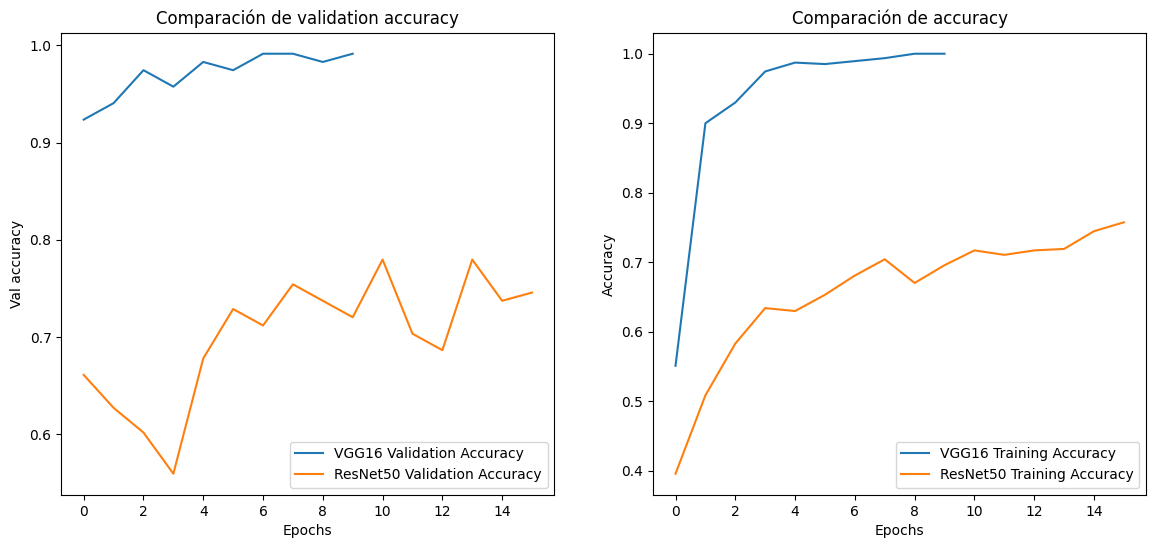

In [122]:
plot_comparison(history_vgg16, history_resnet)


El modelo que se ha diseñado y entrenado está configurado para predecir las clases generales de las imágenes, es decir, está diseñado para determinar si una imagen pertenece a la clase "antes de la cirugía", "durante la cirugía" o "después de la cirugía".

**¿Por qué el modelo predice las clases de las imágenes?**

**Salida del Modelo:**

La última capa del modelo es una capa Dense con 3 neuronas y una activación softmax. Esta configuración indica que el modelo está diseñado para clasificar las entradas en una de tres clases posibles: 0, 1, o 2.

0: Antes de la cirugía.
1: Durante la cirugía.
2: Después de la cirugía.


**Entrada del Modelo:**

El modelo toma dos entradas:
Imágenes: Representadas por X_train, que son las imágenes en sí mismas.
Coordenadas: Representadas por coord_train, que son las coordenadas de las regiones de interés dentro de las imágenes. Sin embargo, estas coordenadas son utilizadas como características adicionales en la clasificación general de la imagen en una de las tres clases mencionadas.
Predicción de Clases Generales:


**Dado que la salida es una clasificación en una de las tres clases generales, el objetivo del modelo es determinar el contexto general de la imagen completa, no la clasificación de las regiones individuales.**